TP Final
==

Trabajo final del curso Machine learning hecho por Santiago Henseler

1)
==

- *Importamos librerias basicas*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd

- *Importamos los datos de vinos incluidos en el dataset de sklearn*


In [2]:
from sklearn.datasets import load_wine as lw
vine = lw()
vine_data_y = vine.target

- *Construimos el primer dataset con los datos originales*

In [3]:
vine_data_x_or = vine.data

- *Construimos el segundo dataset utilizando de la libreria sklearn el modulo de preprocessing*

In [4]:
from sklearn import preprocessing as pp

x_to_pp = np.array(vine.data)

- *Normalizamos y escalamos el dataset*

In [5]:
# Escalamos el dataset
vine_data_x_scaler = pp.StandardScaler().fit(x_to_pp).transform(x_to_pp)

# Normalizamos el dataset
vine_data_x_pp = pp.normalize(vine_data_x_scaler, norm='l1', axis=0)

- *Dividimos los datasets en datos de entrenamiento y de validacion utilizando de la libreria sklearn el modulo de model_selection*

In [6]:
from sklearn.model_selection import train_test_split as tt

# dividimos el primer dataset
vineX_or_train, vineX_or_test, vineY_or_train, vineY_or_test = tt(vine_data_x_or, vine_data_y, test_size=0.2, random_state=7, shuffle=True)

# dividimos el segundo dataset
vineX_pp_train, vineX_pp_test, vineY_pp_train, vineY_pp_test = tt(vine_data_x_pp, vine_data_y, test_size=0.2, random_state=7, shuffle=True)

2)
==

- *Importamos de la libreria sklearn el algoritmo KNN (vecinos cercanos)*

In [7]:
from sklearn import neighbors as knn

# Establecemos un valor para K
k_vecinos = 15

# Creamos el modelo y ponderamos la clasificacion segun la distancia
model_knn = knn.KNeighborsClassifier(k_vecinos, weights='distance')

- *Aplicamos el algoritmo al primer dataset*

In [31]:
# Entrenamos el modelo
model_knn.fit(vineX_or_train, vineY_or_train)

prediccion_or_knn = model_knn.predict(vineX_or_test)

score_or_knn = metrics.adjusted_rand_score(vineY_or_test, prediccion_or_knn)
print(f"Puntuacion del algoritmo en el primer dataset: {score_or_knn}")

Puntuacion del algoritmo en el primer dataset: 0.4772825329394975


- *Aplicamos el algoritmo al segundo dataset*

In [28]:
# Entrenamos el modelo
model_knn.fit(vineX_pp_train, vineY_pp_train)

prediccion_pp_knn = model_knn.predict(vineX_pp_test)

score_pp_knn = metrics.adjusted_rand_score(vineY_pp_test, prediccion_pp_knn)
print(f"Puntuacion del algoritmo en el segundo dataset: {score_pp_knn}")

Puntuacion del algoritmo en el segundo dataset: 1.0


3)
==

- *Importamos de la libreria sklearn el algoritmo KNN (vecinos cercanos)*

In [10]:
from sklearn.tree import DecisionTreeClassifier as tree

# Establecemos el valor de max_depth
max_depth = 10

# Creamos el modelo
model_tree = tree(max_depth=max_depth)

- *Aplicamos el algoritmo al primer dataset*


In [21]:
# Entrenamos el modelo
model_tree.fit(vineX_or_train, vineY_or_train)

score_or_tree = model_tree.score(vineX_or_test, vineY_or_test)

print(f"Puntuacion del algoritmo en el primer dataset: {score_or_tree}")

Puntuacion del algoritmo en el primer dataset: 0.9166666666666666


- *Graficamos el resultado del primer dataset*

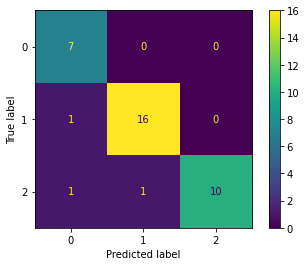

In [22]:
prediccion_or_tree = model_tree.predict(vineX_or_test)

grafM = cm(vineY_or_test, prediccion_or_tree)
grafM_view = cmd(grafM).plot()

- *Aplicamos el algoritmo al segundo dataset*

In [25]:
# Entrenamos el modelo
model_tree.fit(vineX_pp_train, vineY_pp_train)

score_pp_tree = model_tree.score(vineX_pp_test, vineY_pp_test)

print(f"Puntuacion del algoritmo en el segundo dataset: {score_pp_tree}")

Puntuacion del algoritmo en el segundo dataset: 0.9444444444444444


- *Graficamos el resultado del segundo dataset*

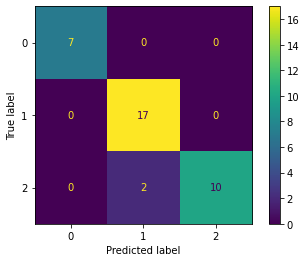

In [26]:
prediccion_pp_tree = model_tree.predict(vineX_pp_test)

grafM = cm(vineY_pp_test, prediccion_pp_tree)
grafM_view = cmd(grafM).plot()

4)
==

- *Importamos de la libreria sklearn el algoritmo PCA*

In [15]:
from sklearn.decomposition import PCA

# Creamos el modelo y redimincionalizamos los datos
pca = PCA(n_components=2)
pca.fit(vine_data_x_pp)
data_mod = pca.transform(vine_data_x_pp)
print(f"Dataset antes de la redimencionalidad: {vine_data_x_pp.shape}")
print(f"Dataset despues de la redimencionalidad: {data_mod.shape}")

Dataset antes de la redimencionalidad: (178, 13)
Dataset despues de la redimencionalidad: (178, 2)


- *Graficamos el resultado*

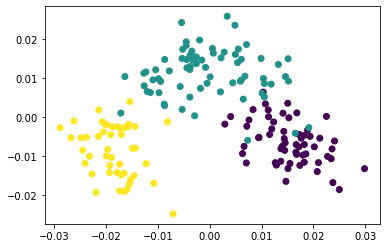

In [16]:
plt.scatter(data_mod[:,0], data_mod[:,1],c=vine_data_y)

5)
==

- *Importamos de la libreria sklearn el algoritmo KMeans*

In [17]:
from sklearn.cluster import KMeans as km

# Establecemos el numero de clusters y de iteraciones
n_clusters = 3
n_iter = 2000

# Creamos el modelo y lo entrenamos
model_km = km(n_clusters=n_clusters, max_iter=n_iter)
model_km.fit(data_mod)

#predicciones del grupo al que cree que pertenece
prediccion_km = model_km.predict(data_mod)
score_km = metrics.adjusted_rand_score(vine_data_y, prediccion_km)

print(f"Puntuacion del algoritmo en el dataset: {score_km}")

Puntuacion del algoritmo en el dataset: 0.8618222264968849


- *Graficamos el resultado mostrando los centroides de desicion*

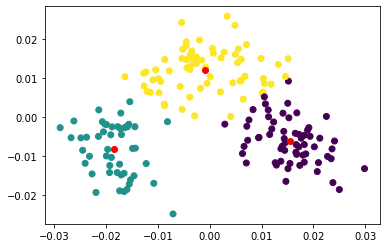

In [18]:
centroid = model_km.cluster_centers_

plt.scatter(data_mod[:,0], data_mod[:,1], c=prediccion_km)
plt.scatter(centroid[:,0], centroid[:,1], c='red')

- *Importamos de la libreria sklearn el algoritmo KMeans por mini-batches*

In [19]:
from sklearn.cluster import MiniBatchKMeans as kmb

# Establecemos el numero de clusters y de iteraciones
n_clusters = 3
n_iter = 2000

# Creamos el modelo y lo entrenamos
model_km_bt = kmb(n_clusters=n_clusters, max_iter=n_iter) 
model_km_bt.fit(data_mod)

#predicciones del grupo al que cree que pertenece
prediccion_km_bt = model_km_bt.predict(data_mod)
score_km_bt = metrics.adjusted_rand_score(vine_data_y, prediccion_km_bt)
print(f"Puntuacion del algoritmo en el dataset: {score_km_bt}")

Puntuacion del algoritmo en el dataset: 0.8951548669070751


C:\Users\Santy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


- *Graficamos el resultado mostrando los centroides de desicion*

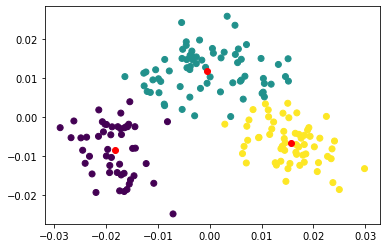

In [20]:
centroid_km_bt = model_km_bt.cluster_centers_

plt.scatter(data_mod[:,0], data_mod[:,1], c=prediccion_km_bt)
plt.scatter(centroid_km_bt[:,0], centroid_km_bt[:,1], c='red')